In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer




In [ ]:
path='//content/drive/MyDrive/DataSets'
df=pd.read_csv(path+'/marketing_data.csv', sep=',')

#Getting familiar with data

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [ ]:
#we can see that the column' Income', has an exra 'space' it's name. This mistake could cause problems in further analysis, 
#so we need to rename it. And change the data type
df.rename(columns={' Income ':'Income'}, inplace=True)
df['Income']=df['Income'].str.replace('$','').str.replace(',','')
df['Income']=df['Income'].astype(float)

In [ ]:
#Let's create some useful columns to better understand the dataset and reveal interesting information

#Age
df['Age']=2021-df['Year_Birth']

#Total Amount spended
df['Spending']=df.MntWines+df.MntFruits+df.MntMeatProducts+df.MntFishProducts+df.MntSweetProducts+df.MntGoldProds

#total of children  at home
df['Children'] = df.Kidhome+df.Teenhome

In [ ]:
#total years of education 
df.Education.unique().tolist()
years_edu={'Education': ['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'],
           'Edu_years':[16,21,12,18,6]}
years_edu=pd.DataFrame(years_edu)
df=pd.merge(df,years_edu,on='Education')


##Dealing with missing values
There are different techniques to deal with missing values, in this case I decided to try a KNN Imputer.

In [ ]:
#looking for missing values
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
Age                     0
Spending                0
Children                0
Edu_years               0
dtype: int64

In [ ]:
#Complete missing values with KNN Imputation
imputer = KNNImputer()
imputer = KNNImputer(n_neighbors=5,metric='nan_euclidean')
# fit on the dataset
imputer.fit(df[['Income','Age','Edu_years']])
# transform the dataset
X = imputer.transform(df[['Income','Age','Edu_years']])
Income_impute=pd.DataFrame(X,columns=['Income','Age','Edu_years'])
df['Income']=Income_impute['Income'].reset_index(drop=True)
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
Age                    0
Spending               0
Children               0
Edu_years              0
dtype: int64

#Statistical summary

In [ ]:
pd.options.display.float_format='{:.2f}'.format
df[['Income','Age','Spending','Children','Edu_years']].describe()


,Income,Age,Spending,Children,Edu_years
count,2240.00,2240.00,2240.00,2240.00,2240.00
mean,52252.06,52.19,605.80,0.95,16.81
std,25049.52,11.98,602.25,0.75,3.05
min,1730.00,25.00,5.00,0.00,6.00
25%,35502.50,44.00,68.75,0.00,16.00
50%,51445.50,51.00,396.00,1.00,16.00
75%,68289.75,62.00,1045.50,1.00,18.00
max,666666.00,128.00,2525.00,3.00,21.00


In [ ]:
df[df['Age']>df['Age'].mean()+3*df['Age'].std()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Spending,Children,Edu_years
1299,1150,1899,PhD,Together,83532.00,0,0,9/26/13,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,0,SP,122,1853,0,21
1662,11004,1893,2n Cycle,Single,60182.00,0,1,5/17/14,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,0,SA,128,22,1,12
1814,7829,1900,2n Cycle,Divorced,36640.00,1,0,9/26/13,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,0,1,IND,121,65,1,12


In [ ]:
df[df['Income']>df['Income'].mean()+3*df['Income'].std()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Spending,Children,Edu_years
147,4931,1977,Graduation,Together,157146.00,0,0,4/29/13,13,1,0,1725,2,1,1,0,0,28,0,1,0,0,0,0,0,0,0,SA,44,1730,0,16
248,9432,1977,Graduation,Together,666666.00,1,0,6/2/13,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,0,SA,44,62,1,16
909,5555,1975,Graduation,Divorced,153924.00,0,0,2/7/14,81,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,SP,46,6,0,16
1237,1501,1982,PhD,Married,160803.00,0,0,8/4/12,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,0,US,39,1717,0,21
1280,1503,1976,PhD,Together,162397.00,1,1,6/3/13,31,85,1,16,2,1,2,0,0,0,1,1,0,0,0,0,0,0,0,SP,45,107,2,21
1551,11181,1949,PhD,Married,156924.00,0,0,8/29/13,85,2,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,CA,72,8,0,21
1604,8475,1973,PhD,Married,157243.00,0,1,3/1/14,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,0,0,0,0,0,IND,48,1608,1,21
1965,5336,1971,Master,Together,157733.00,1,0,6/4/13,37,39,1,9,2,0,8,0,1,0,1,1,0,0,0,0,0,0,0,SP,50,59,1,18


In [ ]:
df_plot=df[['Income','Age','Spending','Children','Edu_years']]
df_plot_melt=pd.melt(df_plot,value_vars=df_plot)
df_plot_melt

,variable,value
0,Income,84835.00
1,Income,57091.00
2,Income,67267.00
3,Income,32474.00
4,Income,21474.00
...,...,...
11195,Edu_years,6.00
11196,Edu_years,6.00
11197,Edu_years,6.00
11198,Edu_years,6.00


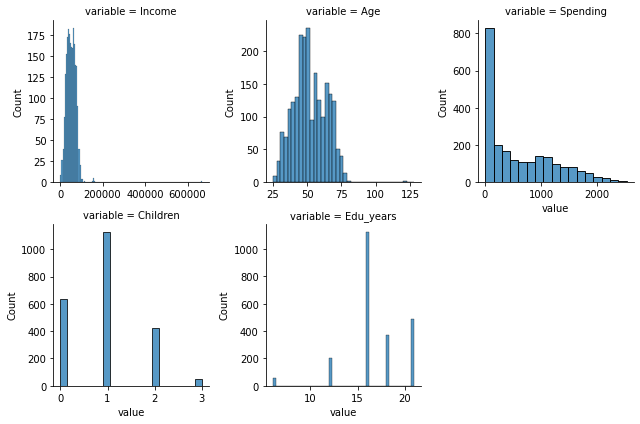

In [ ]:
p1 = sns.FacetGrid (df_plot_melt, col='variable', col_wrap=3, sharex=False, sharey = False) #sharex y sharey hacen que cada gráfico tenga sus escalas en axis
p1 = p1.map(sns.histplot, 'value')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


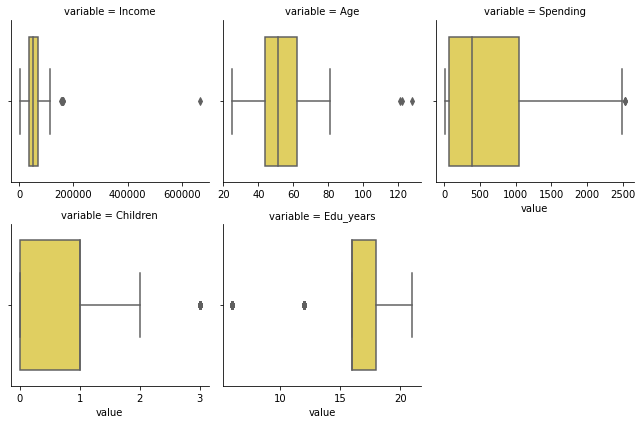

In [ ]:
p2=sns.FacetGrid(df_plot_melt, col='variable', col_wrap=3, sharex=False, sharey=False)
p2=p2.map(sns.boxplot,'value', color='#f5df4c')

In [ ]:
#Let's remove ouliers from the columns 'Income'
df=df.drop(df[df['Income']>600000].index)


In [ ]:
#Age have 3 values that are above the upper fence, as they are 121, 122, 128, we can consider these as outliers, so let's drop them.
df=df.drop(df[df['Age']>120].index)

#Visual EDA

* which country purchases the most?
* Which educational segment purchase more Wine?
* People with no chirldren buy less than people with kinds?
* How much do people spend according to their income?
* Which sales channel is the most effective?
* How many products per category are sell in every sales channel?
* Is the a correlation between the number of visits to the web site and the purchases made through the web site?
* what is the % of customers that accepted the offer through the 5th campaigns?
* Can we identify, what kind of customers would accept the offer in the 1st and 2th campaign?
* what segment of clients complains the most?
* Is there any correlation between variables?

In [ ]:
revenue=df[['Spending','Country']].groupby(by='Country', as_index=False).sum().sort_values('Spending', ascending=False)

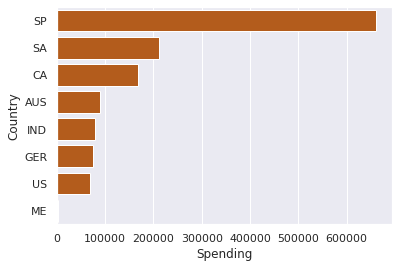

In [ ]:
#which country purchases the most?
f, ax=plt.subplots(figsize=(6,4))
sns.barplot(x=revenue['Spending'], y=revenue['Country'], color='#cc5803')

In [ ]:
wines=df[['Education','MntWines']].groupby(by='Education', as_index=False).sum().sort_values('MntWines', ascending=False)

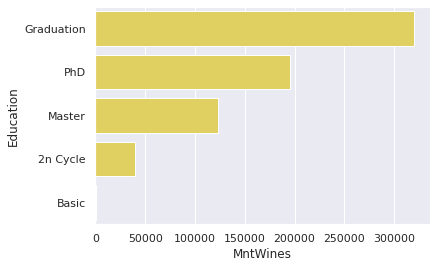

In [ ]:
#Which educational segment purchase more Wine?
f, ax=plt.subplots(figsize=(6,4))
sns.barplot(x=wines['MntWines'],y=wines['Education'], color='#f5df4c')

In [ ]:
kids=df[['Children','Spending']].groupby(by='Children', as_index=False).sum().sort_values('Spending', ascending=False)

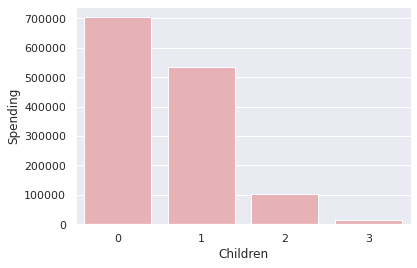

In [ ]:
#People with no chirldren buy less than people with kinds?
f, ax=plt.subplots(figsize=(6,4))
sns.barplot(y=kids['Spending'], x=kids['Children'], color='#efa9ae')

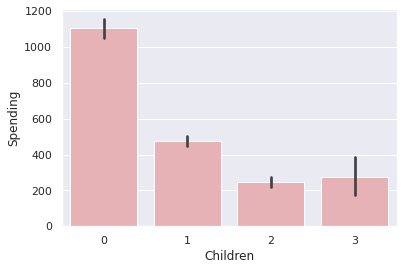

In [ ]:
f, ax=plt.subplots(figsize=(6,4))
sns.barplot(y=df['Spending'], x=df['Children'], color='#efa9ae')

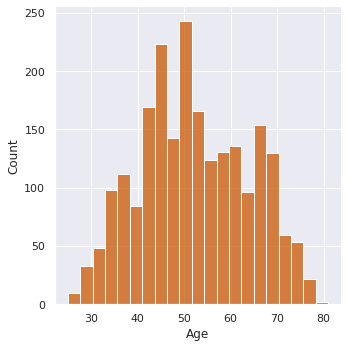

In [ ]:
#distibution of customer by age?
sns.displot(df, x=df['Age'], color='#cc5803')

In [ ]:
#customer distribution by marital status
MaritalS=df[['Marital_Status','ID']].groupby(by='Marital_Status', as_index=False).nunique().sort_values('ID', ascending=False)

Text(0.5, 0, 'Number of customers')

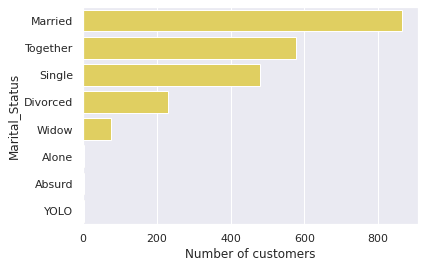

In [ ]:
f, ax=plt.subplots(figsize=(6,4))
sns.barplot(x=MaritalS['ID'],y=MaritalS['Marital_Status'], color='#f5df4c')
plt.xlabel('Number of customers')

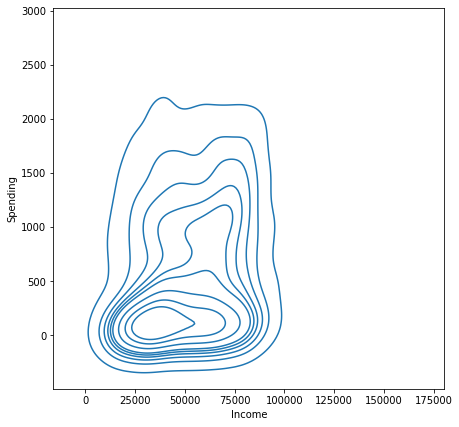

In [ ]:
#How much do people spend according to their income?
f, ax=plt.subplots(figsize=(7,7))
sns.kdeplot(data=df, x=df['Income'], y=df['Spending'])

In [ ]:
#which sale channel is more effective
channels=df[['NumCatalogPurchases','NumDealsPurchases','NumWebPurchases','NumStorePurchases']].sum()

In [ ]:
channels=pd.DataFrame(channels)

In [ ]:
channels=channels.reset_index()

In [ ]:
channels.rename(columns={'index':'channel',0:'Transactions'}, inplace=True)

[Text(0, 0, 'Catalog'),
 Text(0, 0, 'Discount'),
 Text(0, 0, 'Web'),
 Text(0, 0, 'Store')]

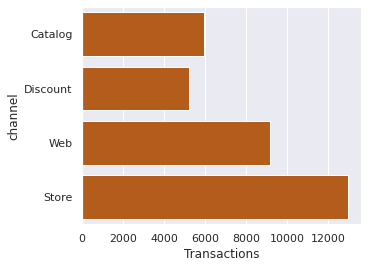

In [ ]:
f, ax=plt.subplots(figsize=(5,4))
ax1=sns.barplot(y=channels['channel'],x=channels['Transactions'], color='#cc5803')
ax1.set_yticklabels(['Catalog','Discount','Web','Store'])

In [ ]:
channels['share']=channels.Transactions/channels.Transactions.sum()
channels 

,channel,Transactions,share
0,NumCatalogPurchases,5955,0.18
1,NumDealsPurchases,5201,0.16
2,NumWebPurchases,9140,0.27
3,NumStorePurchases,12959,0.39


In [ ]:
channels.Transactions.sum()

33255

In [ ]:
#what is the total amount spended in every product category?
products=df[['MntWines',	'MntFruits',	'MntMeatProducts','MntFishProducts', 'MntSweetProducts','MntGoldProds']]
products=products.melt()


In [ ]:
total_products=products.groupby(by=products['variable'],as_index=False).sum()

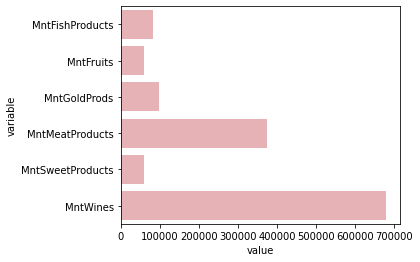

In [ ]:
f, ax=plt.subplots(figsize=(5,4))
sns.barplot(x=total_products['value'], y=total_products['variable'], color='#efa9ae')

In [ ]:
#what is the % of customers that accepted the offer through the 5th campaigns?
campaign=df[['AcceptedCmp3',	'AcceptedCmp4',	'AcceptedCmp5',	'AcceptedCmp1',	'AcceptedCmp2']]
campaign.melt().sum()

variable    AcceptedCmp3AcceptedCmp3AcceptedCmp3AcceptedCm...
value                                                     666
dtype: object

In [ ]:
camp_perform=campaign.melt().groupby('variable').sum()

In [ ]:
camp_perform['percent']=camp_perform['value']/666
camp_perform

,value,percent
variable,,
AcceptedCmp1,144,0.22
AcceptedCmp2,30,0.05
AcceptedCmp3,163,0.24
AcceptedCmp4,167,0.25
AcceptedCmp5,162,0.24


##Logistic Regression

In [ ]:
# let's build a model
first_camp=df[df['AcceptedCmp1']>0]
first_camp[['Age','Income','Edu_years','Spending','Recency','Children']].describe()

,Age,Income,Edu_years,Spending,Recency,Children
count,144.00,144.00,144.00,144.00,144.00,144.00
mean,52.47,78324.44,15.64,1482.22,46.98,0.31
std,13.53,12180.69,3.02,507.38,28.38,0.63
min,27.00,36086.00,12.00,265.00,1.00,0.00
25%,42.00,72904.50,14.00,1126.25,25.00,0.00
50%,51.50,79767.00,14.00,1513.50,45.50,0.00
75%,64.00,85625.25,17.00,1853.00,71.25,0.00
max,77.00,105471.00,21.00,2524.00,99.00,3.00


In [ ]:
#Develop a model to predict if a customer would accept an offer in the 1st campaing
In_couple={'Marital_Status':['Divorced', 'Single', 'Married', 'Together', 'Widow', 'Alone','Absurd', 'YOLO'],
            'Couple':[0,0,1,1,0,0,0,0]}
In_couple=pd.DataFrame(In_couple)

In [ ]:
df=pd.merge(df,In_couple, on='Marital_Status')

In [ ]:
#Now, let's define the variables we are going to use
X=df[['Age','Edu_years','Income','Couple','Children']]
y=df['AcceptedCmp1']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
model.score(X_test,y_test)

0.9323116219667944

In [ ]:
#what segment of clients complains the most?
complains=df[df['Complain']>0]

In [ ]:
complains=complains[['Age','Edu_years','Income','Couple','Children','Spending']]

In [ ]:
complains_melt=pd.melt(complains,value_vars=complains)

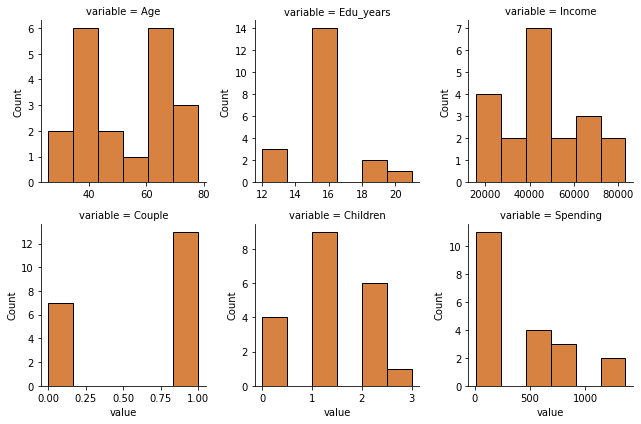

In [ ]:
plot1=sns.FacetGrid(complains_melt, col='variable',col_wrap=3, sharex=False, sharey=False)
plot1=plot1.map(sns.histplot,'value', color='#cc5803')

In [ ]:
correlation=df[['Age','Income', 'Spending', 'Children', 'Edu_years','NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases','NumStorePurchases']]

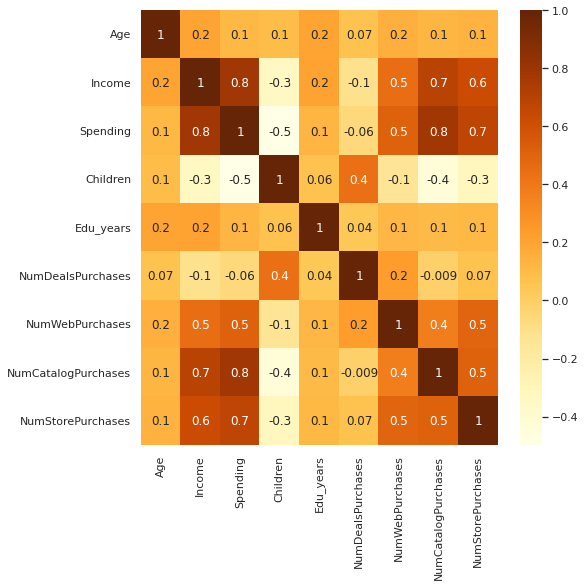

In [ ]:
sns.set(rc={'figure.figsize':(8,8)})
sns.heatmap(correlation.corr(),annot=True,fmt='.1g', cmap='YlOrBr')

In [ ]:
df.to_csv('/sales_analysis.csv', index=False)
!cp /sales_analysis.csv "drive/My Drive/"